<a href="https://colab.research.google.com/github/h8erqqq/ML/blob/main/Econometrics_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.preprocessing import StandardScaler


In [35]:
df = pd.read_excel("/content/ЛР3 .xlsx")
df

,№ п/п,у,х1,х2,х3,х4,х5,х6,х7
0,1,13.0,1.0,1.0,37.0,21.5,6.5,0.0,20.0
1,2,16.5,1.0,1.0,60.0,27.0,22.4,0.0,10.0
2,3,17.0,1.0,1.0,60.0,30.0,15.0,0.0,10.0
3,4,15.0,1.0,1.0,53.0,26.2,13.0,0.0,15.0
4,5,14.2,1.0,1.0,35.0,19.0,9.0,0.0,8.0
5,6,10.5,1.0,1.0,30.3,17.5,5.6,1.0,15.0
6,7,23.0,1.0,1.0,43.0,25.5,8.5,0.0,5.0
7,8,12.0,1.0,1.0,30.0,17.8,5.5,1.0,10.0
8,9,15.6,1.0,1.0,35.0,18.0,5.3,1.0,3.0
9,10,12.5,1.0,1.0,32.0,17.0,6.0,1.0,5.0


In [36]:
df = df.drop(df.index[34:43])
df

,№ п/п,у,х1,х2,х3,х4,х5,х6,х7
0,1,13.0,1.0,1.0,37.0,21.5,6.5,0.0,20.0
1,2,16.5,1.0,1.0,60.0,27.0,22.4,0.0,10.0
2,3,17.0,1.0,1.0,60.0,30.0,15.0,0.0,10.0
3,4,15.0,1.0,1.0,53.0,26.2,13.0,0.0,15.0
4,5,14.2,1.0,1.0,35.0,19.0,9.0,0.0,8.0
5,6,10.5,1.0,1.0,30.3,17.5,5.6,1.0,15.0
6,7,23.0,1.0,1.0,43.0,25.5,8.5,0.0,5.0
7,8,12.0,1.0,1.0,30.0,17.8,5.5,1.0,10.0
8,9,15.6,1.0,1.0,35.0,18.0,5.3,1.0,3.0
9,10,12.5,1.0,1.0,32.0,17.0,6.0,1.0,5.0


In [37]:
Y = df['у']
X = df[['х1','х2','х3','х4','х5','х6','х7',]]

In [38]:
# Очистка независимых переменных от "inf" и "nan"
X = X.replace([np.inf, -np.inf], np.nan)  # Заменяет бесконечные значения на NaN
X = X.dropna()  # Удаляет строки с NaN значениями
Y = Y.reset_index(drop=True)
X = X.reset_index(drop=True)
print(len(Y))
print(len(X))


34
34


In [39]:
# Добавляю константу к X
X = sm.add_constant(X)

# Строю модель множественной регрессии
model = sm.OLS(Y, X).fit()

#результаты
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      у   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     9.636
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.12e-06
Time:                        13:27:22   Log-Likelihood:                -85.038
No. Observations:                  34   AIC:                             186.1
Df Residuals:                      26   BIC:                             198.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7375      2.560      0.679      0.5

y=1.7375−0.7426⋅х1+0.8351⋅х2+0.3991⋅х3−0.0844⋅х4−0.1242⋅х5+1.2069⋅х6−0.0448⋅х7
                                                                     
                                                                                                                                               
Это уравнение позволяет вам предсказывать значения зависимой переменной
у на основе значений всех семи независимых переменных
х

х1,х2,х3,х4,х5,х6,х7.

<ipython-input-40-ef4b7feed8d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


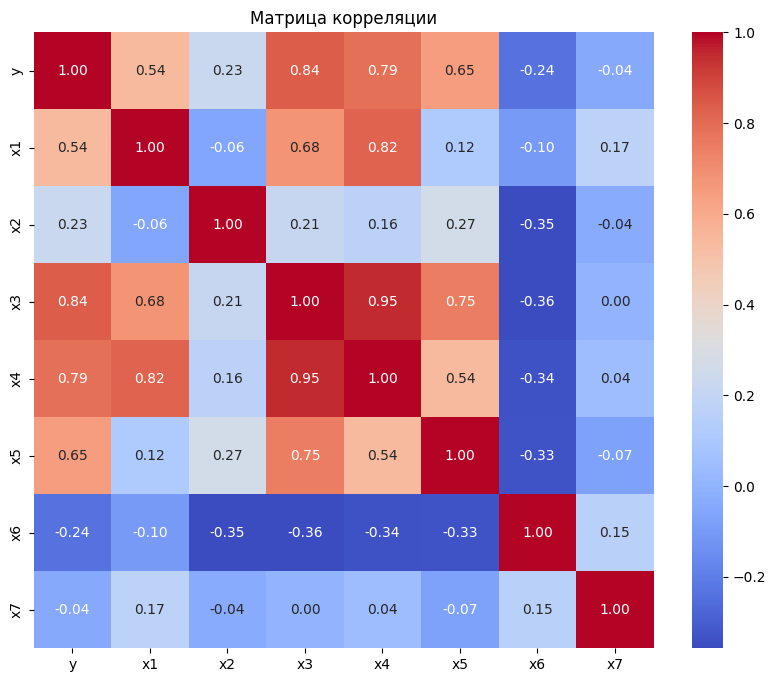

           у        х1        х2        х3        х4        х5        х6  \
у   1.000000  0.537482  0.229718  0.840340  0.785495  0.647929 -0.239710   
х1  0.537482  1.000000 -0.057781  0.681178  0.822198  0.117878 -0.098058   
х2  0.229718 -0.057781  1.000000  0.210104  0.162726  0.266762 -0.353553   
х3  0.840340  0.681178  0.210104  1.000000  0.951475  0.750577 -0.357674   
х4  0.785495  0.822198  0.162726  0.951475  1.000000  0.536687 -0.337600   
х5  0.647929  0.117878  0.266762  0.750577  0.536687  1.000000 -0.333924   
х6 -0.239710 -0.098058 -0.353553 -0.357674 -0.337600 -0.333924  1.000000   
х7 -0.044215  0.167897 -0.035752  0.000019  0.044712 -0.073493  0.154254   

          х7  
у  -0.044215  
х1  0.167897  
х2 -0.035752  
х3  0.000019  
х4  0.044712  
х5 -0.073493  
х6  0.154254  
х7  1.000000  


In [40]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()
# Вывод матрицы корреляции
print(correlation_matrix)

Можно увидеть сильную корреляцию между х3 и х4, сочтём их за коллинеарные.


In [48]:
df = df.drop(['х3','х4'], axis=1)
df.head()

,№ п/п,у,х1,х2,х5,х6,х7
0,1,13.0,1.0,1.0,6.5,0.0,20.0
1,2,16.5,1.0,1.0,22.4,0.0,10.0
2,3,17.0,1.0,1.0,15.0,0.0,10.0
3,4,15.0,1.0,1.0,13.0,0.0,15.0
4,5,14.2,1.0,1.0,9.0,0.0,8.0


In [52]:
# Проверяем после исключения коллинеарных векторов
Y = df['у']
X = df[['х1', 'х2', 'х5','х6','х7']]  # исключен x3, x4
# Добавляю константу к X
X = sm.add_constant(X)

# Строю модель множественной регрессии
model = sm.OLS(Y, X).fit()

# Выведите результаты
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      у   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     10.63
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           8.46e-06
Time:                        13:54:13   Log-Likelihood:                -88.696
No. Observations:                  34   AIC:                             189.4
Df Residuals:                      28   BIC:                             198.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2190      2.668      1.206      0.2

y'=3.2190+4.6481⋅х1+1.3862⋅х2+0.7012⋅х5+0.6340⋅х6−0.0884⋅х7

Здесь
 y' - это оцененное значение зависимой переменной y
x1, x2, x5, x6, х7 - это независимые переменные.

Каждая строка представляет один из факторов, и важным является столбец P>|t|, который показывает P-значение для теста статистической значимости параметра (фактора).

Если P-значение меньше выбранного уровня значимости (обычно 0,05), то фактор считается статистически значимым, и его коэффициент (coef) можно считать надежным для интерпретации.

Если P-значение больше уровня значимости, то фактор считается нестатистически значимым. Ваш вывод показывает P-значение (P>|t|) для каждого фактора.

В нашем случае:

"х1" имеет P-значение 0.000 (меньше 0,05), поэтому он статистически значим.

"х2" имеет P-значение 0.317 (больше 0,05), поэтому он нестатистически значим.

"х5" имеет P-значение 0.000 (меньше 0,05), поэтому он статистически значим.

"х6" имеет P-значение 0.654 (больше 0,05), поэтому он нестатистически значим.

"х7" имеет P-значение 0.437 (больше 0,05), поэтому он нестатистически знач

In [53]:
df = df.drop(['х2','х6', 'х7'], axis=1)
df.head()

,№ п/п,у,х1,х5
0,1,13.0,1.0,6.5
1,2,16.5,1.0,22.4
2,3,17.0,1.0,15.0
3,4,15.0,1.0,13.0
4,5,14.2,1.0,9.0


In [55]:
# Стандартизация данных
Y = df['у']
X = df[['х1', 'х5']]  # Используем только статистически значимые факторы

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
Y_std = scaler.fit_transform(Y.values.reshape(-1, 1))

# Добавьте константу (intercept) к X
X_std = sm.add_constant(X_std)

# Постройте модель множественной регрессии в стандартизированной форме
model_std = sm.OLS(Y_std, X_std).fit()

# Выведите результаты анализа
print("Уравнение множественной регрессии в стандартизованной форме:")
print(model_std.summary())

Уравнение множественной регрессии в стандартизованной форме:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     27.02
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.61e-07
Time:                        14:02:50   Log-Likelihood:                -31.090
No. Observations:                  34   AIC:                             68.18
Df Residuals:                      31   BIC:                             72.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Y_std = 0.4676 * X1_std + 0.5928 * X2_std

где:

Y_std - стандартизированное значение зависимой переменной (y).
X1_std и X2_std - стандартизированные значения независимых переменных (x1 и x2).
0.4676 и 0.5928 - стандартизированные коэффициенты регрессии для соответствующих независимых переменных.
const - это интерсепт, который в данном случае равен нулю (как указано в таблице).
Это уравнение показывает, как стандартизированные значения независимых переменных (x1 и x2) влияют на стандартизированное значение зависимой переменной (y) в вашей модели.

Коэффициенты 0.4676 и 0.5928 показывают величину и направление влияния каждой независимой переменной на зависимую переменную в стандартных единицах.

Частное уравнение для X1_std (при фиксированном X2_std):
Y_std = 0.4676 * X1_std

Это уравнение показывает, как изменения стандартизированной независимой переменной X1_std влияют на стандартизированную зависимую переменную Y_std, при этом значение X2_std остается постоянным.

Частное уравнение для X2_std (при фиксированном X1_std):
Y_std = 0.5928 * X2_std

Это уравнение показывает, как изменения стандартизированной независимой переменной X2_std влияют на стандартизированную зависимую переменную Y_std, при этом значение X1_std остается постоянным.

In [70]:
df

,№ п/п,у,х1,х5
0,1,13.0,1.0,6.5
1,2,16.5,1.0,22.4
2,3,17.0,1.0,15.0
3,4,15.0,1.0,13.0
4,5,14.2,1.0,9.0
5,6,10.5,1.0,5.6
6,7,23.0,1.0,8.5
7,8,12.0,1.0,5.5
8,9,15.6,1.0,5.3
9,10,12.5,1.0,6.0


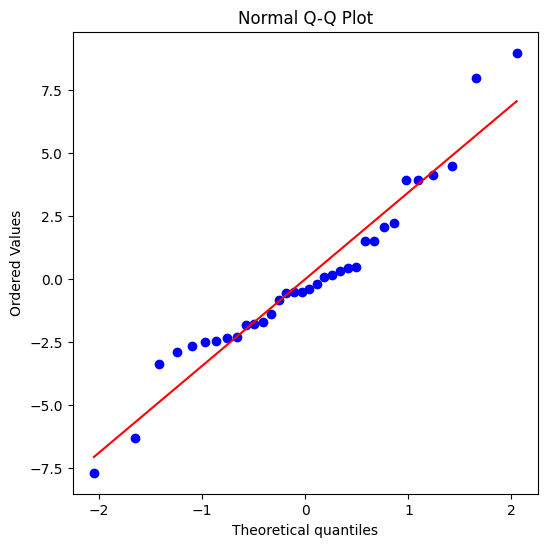

Breusch-Pagan test: LM Statistic = 2.5872017833038257, p-value = 0.2742813453231278, F-statistic = 1.276601573809968, p-value = 0.2932442241989626
Durbin-Watson test statistic: 1.957664660440169


In [77]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson


# Получим остатки модели
residuals = model.resid

# Добавьте константу (смещение) к матрице признаков
X_with_const = sm.add_constant(X)

# 1. Оценка нормальности остатков с помощью QQ-графика
model = sm.OLS(Y, X_with_const).fit()
residuals = model.resid

fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

# 2. Проверка гомоскедастичности остатков с помощью теста Бройша-Пагана
bp_test = het_breuschpagan(residuals, X_with_const)
print(f'Breusch-Pagan test: LM Statistic = {bp_test[0]}, p-value = {bp_test[1]}, F-statistic = {bp_test[2]}, p-value = {bp_test[3]}')

# 3. Проверка наличия автокорреляции в остатках с помощью теста Дарбина-Уотсона
dw_test = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test}')


Остатки, в основном, подчиняются закону нормального распределения, что следует из графика. Пояснение: если точки на графике следуют близко к диагонали, это может указывать на нормальное распределение остатков. Однако, если точки сильно отклоняются от диагонали, это может быть признаком ненормальности распределения остатков.

Тест Брауш-Пэгана указывает на отсутствие статистически значимой гетероскедастичности в остатках. Это хорошо, так как гетероскедастичность может влиять на точность и надежность оценок коэффициентов регрессии.

Значение статистики Дарбина-Уотсона находится в диапазоне от 0 до 4, и значение около 2 указывает на отсутствие первого порядка автокорреляции (то есть, отсутствие систематической структуры в остатках). Наш результат (1.957) близок к 2, что также указывает на отсутствие автокорреляции.

 Результаты указывают на то, что ваши остатки не проявляют гетероскедастичности и автокорреляции на уровне статистической значимости, что делает регрессионную модель более надежной и годной для интерпретации.

QQ-график (квантиль-квантиль график) - это графический способ визуальной проверки того, насколько близко распределение наблюдаемых данных к теоретическому нормальному распределению (или другому теоретическому распределению).

Если точки на QQ-графике следуют прямой линии, это означает, что данные близки к теоретическому распределению. Если точки отклоняются от прямой линии, это может указывать на отклонение данных от ожидаемого распределения.